# Final Project - The Best Neighborhood for Dogs
### by Kishore Annambhotla, Bella DeRubeis, and Dionysios Mallas (Group 6)
---

## Introduction

Our project seeks to determine the Pittsburgh neighborhood **best-suited for dogs.** We decided to approach this question by measuring and analyzing data related to things in the environment that benefit dogs in particular.

---

## Our Metric & Submetrics

Our overall metric is the quality of a neighborhood for dogs. We decided to measure this with three submetrics: **neighborhood crime rate, average daily air quality, and the presence of parks.** Each of these submetrics was measured using datasets from the **Western Pennsylvania Regional Data Center (WPRDC):**
* [Public Safety 2010](https://data.wprdc.org/dataset/pgh/resource/204f63f4-296f-4f1d-bbdd-946b183fa5a0)
* [Daily AQI Data](https://data.wprdc.org/dataset/allegheny-county-air-quality/resource/4ab1e23f-3262-4bd3-adbf-f72f0119108b)
* [Allegheny County Parks Outlines](https://data.wprdc.org/dataset/allegheny-county-parks-outlines) and [Pittsburgh Parks](https://data.wprdc.org/dataset/parks1)

---

## Finding The Best Neighborhood

### AQI Data

Given that dogs are active and spend plenty of time outside, air quality is very important in order to maximize a dog's health. Using daily AQI data from the WPRDC, we can measure and compare the **average daily air quality** in various Pittsburgh neighborhoods. Because this dataset ranges from the start of 2016 to the current day, we will only look at the most relevant data **(data from 2024).**

We can also put our data into a **vertical bar chart** to easily compare our measurements.

<Axes: title={'center': 'Average Daily Air Quality in 2024'}, xlabel='Pittsburgh Neighborhood', ylabel='Air Quality Index'>

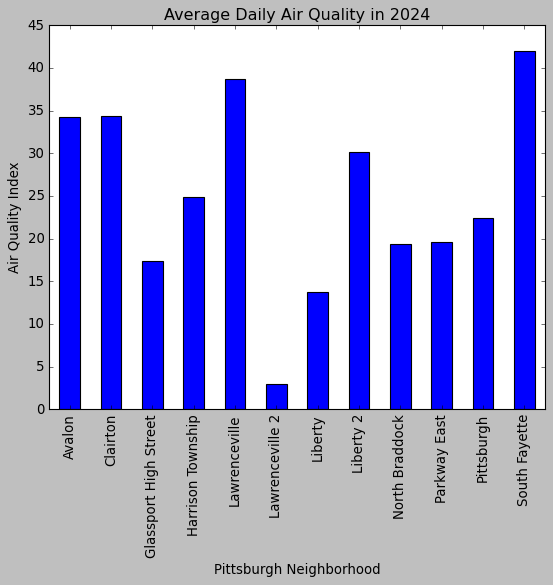

In [53]:
# For data analysis and visualization
import pandas as pd
import matplotlib.pyplot as plt

# Read tsv into new data frame
aqi = pd.read_csv("daily_aqi.tsv", sep="\t")

# Narrow down dataset to current year
start_date = '2024-01-01'
mask_current_year = aqi['date'] >= start_date
aqi_current_year = aqi.loc[mask_current_year]

# Get relevant data series
mean_aqi_current_year = aqi_current_year.groupby(['site'])['index_value'].mean('index_value')

# Create data visualization
plt.style.use('classic')
mean_aqi_current_year.plot(kind='bar', 
                           title='Average Daily Air Quality in 2024',
                           ylabel='Air Quality Index',
                           xlabel='Pittsburgh Neighborhood')

Even through the measurements for Lawrenceville 2 and Liberty are the best in the dataset, the measurements for Lawrenceville and Liberty 2 are significantly worse. When combined, the data tells us that the air quality in Lawrenceville and Liberty is somewhat variable and may not be able to be accurately determined. As a result, we decided that, among neighborhoods in this dataset, **Glassport** has the best air quality in 2024, making it a good candidate for the best Pittsburgh neighborhood for dogs.

### Safety
For dog owners, safety is a key factor when choosing where to live or walk their pets. A safe neighborhood means fewer risks during dog walks and a more relaxed experience for both the dog and the owner. To measure safety, we analyzed crime data from the Public Safety 2010 dataset.

To find the safest neighborhoods, I used crime data from the Public Safety 2010 dataset. I combined major and minor crime reports and calculated the crime rate per 100 people for each neighborhood. The neighborhoods with the lowest crime rates were considered the safest.

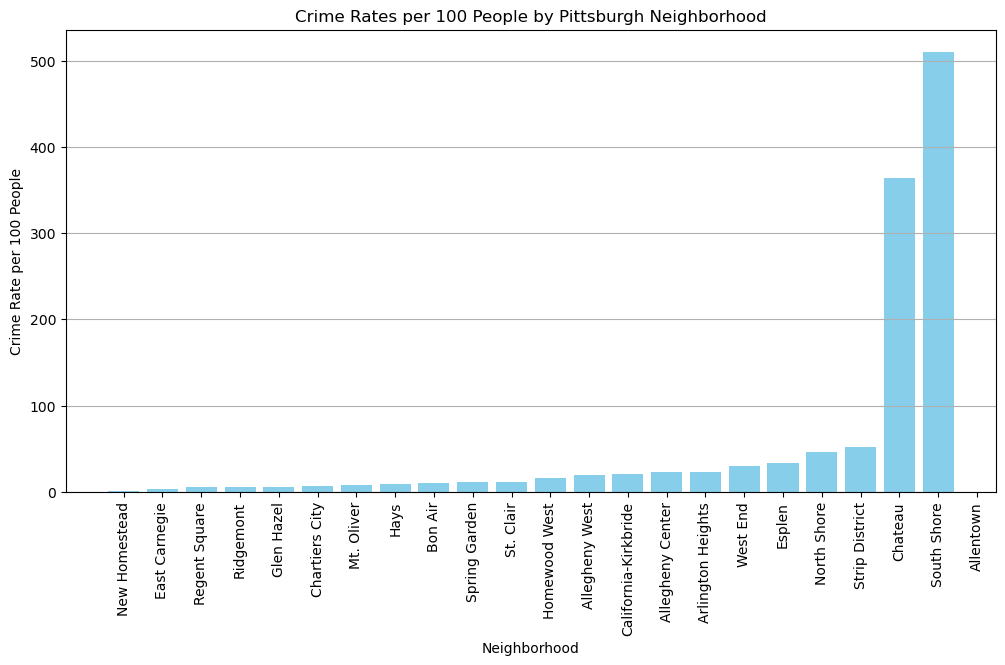

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(safe_neighborhoods['Neighborhood'], safe_neighborhoods['Crime Rate per 100 People'], color='skyblue')

plt.xticks(rotation=90)
plt.title('Crime Rates per 100 People by Pittsburgh Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Crime Rate per 100 People')
plt.grid(axis='y')  
plt.show()

New Homestead was identified as the safest neighborhood, which makes it a great choice for dog owners looking for a secure place for outdoor activities. Safety is crucial for dog owners, and New Homestead’s low crime rate suggests it is an excellent option for a dog-friendly environment. However, this analysis used data from 2010, so recent changes in safety might not be reflected.

### Parks

### Overall

## Conclusions

### Bella

### Dio

### Kishore